## 1.Explanatory Data Analysis(EDA)

- General Insight, 
- Data inspection, 
- Scatter Plots, Violin Plots 
- Conversion of Categorical Variables to Numerical Variables

## 2.Validation of Model Assumptions

- Correlation, Multicolinearity

## 3.Model Training and Testing

- Regression Model Metrics
- Training with all variables
- Train without statistically insignificant variables
- Train without outliers
- Report the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
insurance = pd.read_csv('datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# look up the data types and missing values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


`insurance` is a DataFrame object with 1338 rows and 7 columns. There is no missing value present in our data.Here are the coloumns;
- age: age of primary user.
- sex: gender.
- bmi: Body Mass Index, ideally between 18.5 and 24.9
- children: number of children/dependents
- smoker: smoking or not
- region: the beneficiary's residential area in the US.
- charges: total premium billed by health insurance

We will use `charges` as our target variable and the rest as the predictors. Notice that some predictors are numerical(int64, float64) such as age,bmi,children and some are categorical(object) sex,smoker and region. **Categorical variables MUST be converted to numerical varibles before the model training stage**

In [4]:
#Notice that this works only on numerical variables. Watch out for weird values
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As a first step, let's visualize numerical variables vs charges using scatter plots(1). Then implement the same idea for categorical variables via 'violin' plot(2). Lastly, we can actually further analyse the data via scatter plot over "fixed" categorical values(3). Seaborn library is super useful to achieve these tasks.

Concerning the first plot, we can say the premium goes up with the age(?), having more children maybe helps. However, violin plot says, smoking is BAD!

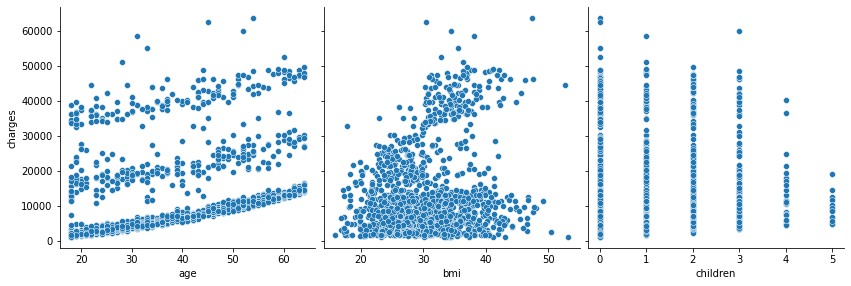

In [5]:
sns.pairplot(insurance, x_vars = ['age','bmi','children'], y_vars='charges', height = 4, aspect = 1, kind = 'scatter')
plt.show()

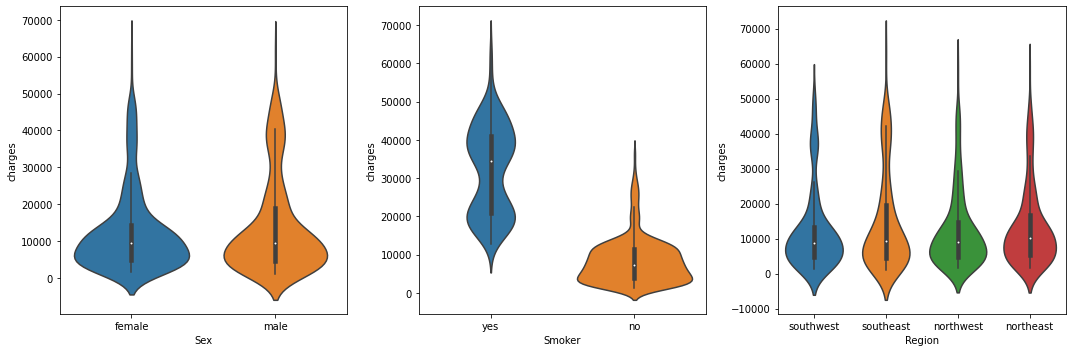

In [6]:
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])

sns.violinplot(x='sex',y='charges',data=insurance)
ax.set_xlabel("Sex")

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(x='smoker',y='charges',data=insurance)
ax.set_xlabel("Smoker")

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(x='region',y='charges',data=insurance)
ax.set_xlabel("Region")

fig.tight_layout()
plt.show()

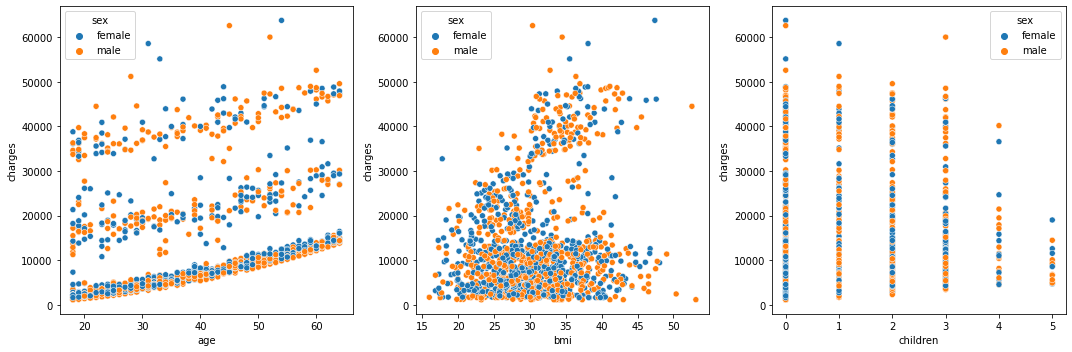

In [7]:
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])
sns.scatterplot(x='age',y='charges',hue = 'sex',data=insurance)

ax = fig.add_subplot(gs[0, 1])
sns.scatterplot(x='bmi',y='charges',hue = 'sex',data=insurance)

ax = fig.add_subplot(gs[0, 2])
sns.scatterplot(x='children',y='charges',hue = 'sex',data=insurance)

fig.tight_layout()
plt.show()

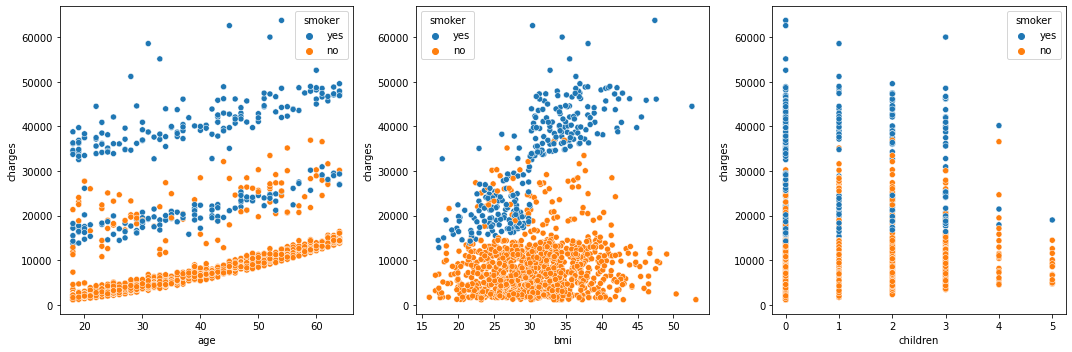

In [8]:
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])
sns.scatterplot(x='age',y='charges',hue = 'smoker',data=insurance)

ax = fig.add_subplot(gs[0, 1])
sns.scatterplot(x='bmi',y='charges',hue = 'smoker',data=insurance)

ax = fig.add_subplot(gs[0, 2])
sns.scatterplot(x='children',y='charges',hue = 'smoker',data=insurance)

fig.tight_layout()
plt.show()

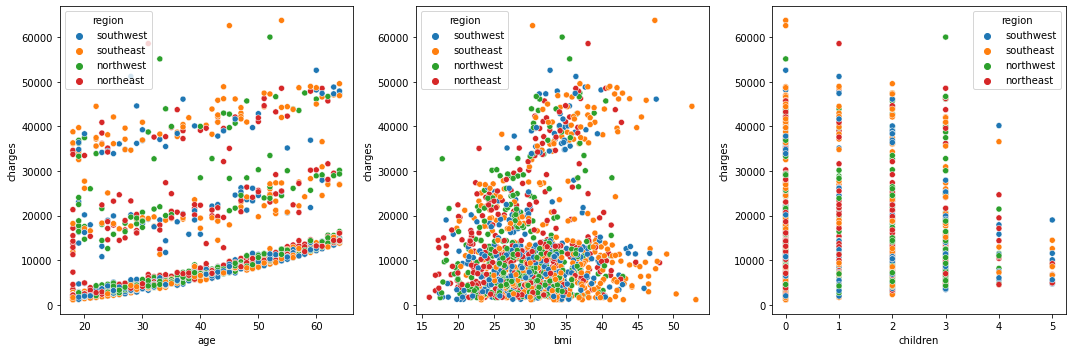

In [9]:
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])
sns.scatterplot(x='age',y='charges',hue = 'region',data=insurance)

ax = fig.add_subplot(gs[0, 1])
sns.scatterplot(x='bmi',y='charges',hue = 'region',data=insurance)

ax = fig.add_subplot(gs[0, 2])
sns.scatterplot(x='children',y='charges',hue = 'region',data=insurance)

fig.tight_layout()
plt.show()

#### Convert Categorical Variables to Numerical Ones
Now we can convert the categorical variables to numerical ones. Without this step, we CANT analyse or build a ML model...

In [10]:
insurance_enc = pd.get_dummies(insurance, columns = ['sex','smoker','region'],drop_first=True)
insurance_enc

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


Consider a simple example. Wealth level: Good, Medium, Poor vs Number of Children. Use dummies by dropping Poor

The model looks like $$Y = w_0+w_1X_1+w_2X_2$$
So $X_3$ is not here? Actually if $X_1=0,X_2=0$ (means this person is poor) $\hat{Y} = w_0$ which is the expected number of children if the family is poor. So the information about the dropped person is embedded in the constant term. This is one option, another option is to include all dummies but drop the intercept term. So the rule of thumb is *either drop the intercept term in the model and include a dummy for each category, or keep the intercept and exclude the dummy for any one category.* We will do the first one.

## 2. Validation of Model Assumptions

First of all, recall the general idea. Find $$\beta_0, \beta_1, \beta_2,.. \beta_n$$ 

which minimize $$ \Vert \hat{Y} - \text{Y}\Vert$$
 

where $\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$. Here we have
- $\hat{Y}$ is the predicted value vector of target variable and $Y$ is the real value vector 
- $X_1, X_2, ..., X_n$ are the predictors(age,sex, bmi etc)
- $n$ is the number of predictors (n = 8 in this case)


However, in order to use linear regression as a prediction tool, we should initially check two assumptions(there are more but we will discuss them on the fly.)
1. Independent variables must have be correlated to the target variable.
2. Independent variable should not be correlated with each other(Multicolinearity).

Let's start from the first one. 
### Correlation
In order to apply Linear Regression to our data, we have to check the correlation between each candidate predictors (TV, Radio and Newpaper) and the target variable(Sales). A variable will not be a good predictor if it doesn't significantly correlated with the target variable. Carefully note that a weak correlation does not mean there is no relationship at all, there may be some non-liner relationship but definetely not linear.

Correlation is a statistical measure on how strong a linear relationship between two variables. The values ranged between -1.0 and 1.0, where:
- Positive value = positive correlation, means one variable increases as the other variable increases, or vice versa. The closer to 1, the stronger the positive relationship.
- Negative value = negative correlation, means one variable decreases as the other variable increases, or vice versa. The closer to -1, the stronger the negative relationship.
- Zero = no correlation, means that a variable has nothing to do with the other variable.


We will use two methods to inspect the correlation. First one is to scatter plot each variable vs target variable. Another one is to display the Correlation Coefficient which which measures the linear relationship between two quantitative variables.

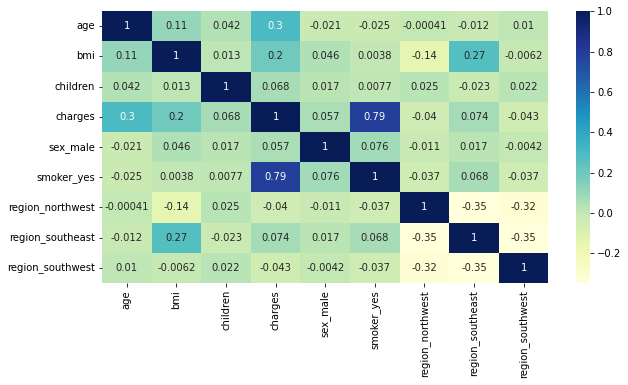

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.heatmap(insurance_enc.corr(), cmap="YlGnBu", annot = True)
plt.show()

We will look at the charges row(coloumn).Notice the correlation between smoking and charges. If you smoke, charges go up and vise versa. Age and bmi factors appear to have some effect on charges as well. All other variables seem to have insignificant effect on the amount of insurance charge.

### Multicolinearity

One great way to check whether colinearity exist in the features is to calculate the variable inflation factor(VIF). This is applicable only for NUMERICAL VARIABLES!.
Idea here is to pick one variable and create linear regression aganist others. For each regression, $R^2$ value is calculated then we define $$VIF = \dfrac{1}{1-R^2}$$
Here $R^2$ is simply the square of the correlation coefficent. Recall that $-1\leq R \leq 1$. Thus greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. Generally, a VIF above 5-10 indicates a high multicollinearity.

If multicolinearity exist in the data, these features must be removed sequentially in the model. Othwerwise, it can be impossible to explain the possible causes of the changes in the data. This is like using maple syrup, sugar and honey in a cake and try to understand the source of the sweetness(: 

Here, it seems that the bmi and age are somewhat co-linear but this would be a strong claim...So let's keep them.

In [12]:
#independent variables set
X = insurance.drop(['charges','sex','smoker','region'],axis=1)
print(X.columns)
[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

Index(['age', 'bmi', 'children'], dtype='object')


[7.5365497962195755, 7.846514551816255, 1.7966372660866277]

##  3. Model Training and Testing

### a.Regression Model Metrics
First of all, let's review the metrics we will use assess the performance of a linear regression model. There are lots of options. Some of the well known metrics are follows.
In order to choose the best model, we are going to use several metrics:

- Mean Square Error, lower the better
- Root Mean Squared Error (RMSE), the lower the better
- Mean Absolute Percentage Error (MAPE), the lower the better
- R-squared, the higher the better

Let $y_i$ be the real target values given in the dataset and $\hat{y}_i$ be the predicted values by the model.

 $$\text{MSE} = \dfrac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}_i-y_i\Big)^2$$
 $$\text{RMSE} = \sqrt{\text{MSE}}$$
 $$\text{MAPE} = \dfrac{100}{N}\sum_{i=1}^{N}\left|\dfrac{\hat{y}_i-y_i}{y_i}\right|$$

- R-sqaured(has nothing to do R*R) is a statistical measure that measures how good the model can explain the data. Here is the derivation. Let $\bar{y}$ be the real mean of the data, i.e, $\bar{y}=\dfrac{1}{N}\sum_{i=1}^{N}y_i$.Define the followings $\text{SS}_{res}=\sum_{i=1}^{N}(\hat{y}_i-y_i)^2$, and $\text{SS}_{total}=\sum_{i=1}^{N}(\bar{y}_i-y_i)^2$. Then R-sqaured is 

$$R^2 =1-\dfrac{\text{SS}_{res}}{\text{SS}_{total}} $$

- If you keep guessing the mean, R^2=0. This is the baseline model.
- If all predictions are correct, R^2 = 1. This is the perfect model.
- Thus closer to 1, the better the model. If the fit is really bad, R^2 can be negative as well.t 

R^2 is the most important measure in linear regression models. It has several variations(adjusted R^2) but R^2 should work for now for us. In this project, let's use R^2 and MAPE metrics. Both of them are avaliable in sklearn library.

### b. Model Training and Testing

Here is the experimental stages. In each case, we train the model on train set and evaluate the metrics on testing set. We will compare the scores and try to choose the best model.

- Model1: Train with all variables.
- Model2: We saw that region and sex are not significant variables. Train a model without them. But 
- Model3: Grab the original data and remove the outliers. Train a model without outliers. 
- Model4: Remove region and sex from outliers and try again.

Notice that we can keep going forever but this should be enough for demonstration purposes as no one is us paying for this project. Start with creating train and test sets.

In [13]:
X = insurance_enc.drop(['charges'],axis = 1) # predictors
y = insurance_enc.charges.values             # target values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("X_Train:", X_train.shape)
print("X_Test:", X_test.shape)
print("y_Train:", y_train.shape)
print("y_Test:", y_test.shape)

X_Train: (1070, 8)
X_Test: (268, 8)
y_Train: (1070,)
y_Test: (268,)


In [15]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
717,60,24.320,1,1,0,1,0,0
407,47,23.600,1,0,0,0,0,1
1258,55,37.715,3,1,0,1,0,0
622,49,21.300,1,0,0,0,0,1
1059,32,33.820,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1218,46,34.600,1,0,1,0,0,1
1273,35,27.610,1,1,0,0,1,0
559,19,35.530,0,1,0,1,0,0
352,30,27.700,0,0,0,0,0,1


To do quick and clean experiment, we will define the following function. It basically takes trainhing and testing sets and drop the features if necessary. It then train the model and evaluate the metrics in a dictionary format.

In [16]:
def TrainTestModel(X_train, X_test, y_train, y_test, features_to_drop = []):
    #drop the required coloumns(features) and create new train and test sets
    X_train_new = X_train.drop(features_to_drop, axis = 1) 
    X_test_new = X_test.drop(features_to_drop, axis = 1)
    
    #train the model on training set, drop the intercept.
    model =  LinearRegression().fit(X_train_new,y_train)
    
    #get the predictions
    y_pred = model.predict(X_test_new)
    
    #get the r-squared score on testing set
    r2 = round(metrics.r2_score(y_pred,y_test),ndigits=3)
    MAPE = round(100*metrics.mean_absolute_percentage_error(y_pred,y_test),ndigits=2)
    scores = {'r-squared':r2,
              'MAPE': MAPE}
    
    return model,scores
    

#### Model1: Train with All Features
Notice how big is the coefficient for smoke comparing to other variables.

In [17]:
model1, scores1 = TrainTestModel(X_train, X_test, y_train,y_test, features_to_drop = [])
scores1

{'r-squared': 0.694, 'MAPE': 109.58}

In [18]:
#We can always look up the predicted coefficents. Let's do a quick dictionary variable
model_params = dict(zip(list(X_train.columns),list(model1.coef_)))
model_params

{'age': 261.9908592415241,
 'bmi': 321.3990113893255,
 'children': 414.06149364615834,
 'sex_male': -112.81997615404059,
 'smoker_yes': 24343.850710567385,
 'region_northwest': -276.86539363931274,
 'region_southeast': -740.3817788977285,
 'region_southwest': -725.012531206517}

$Y = w_0+w_1(age)+w_2(bmi)+ ...$

#### Model2: Train without Sex and Region

Among these three models, notice that the model2c has the worst MAPE and model2b without region seems the best

In [19]:
#remove "sex"
features_to_drop = ['sex_male']
#features_to_drop = ['sex_male','sex_female']
model2a, scores2a = TrainTestModel(X_train, X_test, y_train,y_test, features_to_drop)
scores2a

{'r-squared': 0.694, 'MAPE': 74.23}

In [20]:
#remove "region"
features_to_drop = ['region_northwest', 'region_southeast','region_southwest']
model2b, scores2b = TrainTestModel(X_train, X_test, y_train,y_test, features_to_drop)
scores2b

{'r-squared': 0.689, 'MAPE': 46.64}

In [21]:
#remove "sex" and region"
features_to_drop = ['sex_male','region_northwest', 'region_southeast','region_southwest']

model2c, scores2c = TrainTestModel(X_train, X_test, y_train,y_test, features_to_drop)
scores2c

{'r-squared': 0.689, 'MAPE': 45.76}

#### Model3: Train Without Outliers

Boxplot uses a interquartile range (IQR) method to display outliers. We substract the 75th and 25th percentiles to compute IQR, so IQR = Q3 - Q1. Then any value outside of the interval (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) is taken as an outlier. These lower and upper values are known as lower and upper whiskers as well. We can  create a simple function to iteratively remove the outliers from the data and return a data frame without outliers. After that, since we change the number of rows, we have to create a new set of training and testing sets.

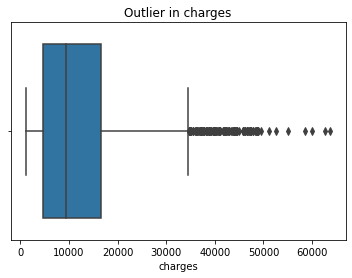

In [22]:
# visulize the outliers in "charges". Note that same g
outlier_plot = sns.boxplot(insurance_enc['charges'])
outlier_plot.set_title('Outlier in charges')
plt.show()

In [23]:
def ReturnDataNoOutlier(DataFrame, target):
    DataWoOutlier = DataFrame.copy()
    while True:
        Q1 = DataWoOutlier[target].quantile(0.25)
        Q3 = DataWoOutlier[target].quantile(0.75)
        IQR = Q3 - Q1
        LWhisker = Q1 - 1.5 * IQR
        UWhisker = Q3 + 1.5 * IQR
        outlier_bool = ((DataWoOutlier[target] < LWhisker)|(DataWoOutlier[target] > UWhisker))
        outlier_counter = sum(outlier_bool)       
        if outlier_counter == 0:
            outlier_perc = (DataFrame.shape[0] - DataWoOutlier.shape[0])/DataFrame.shape[0]
            print(f'{100*outlier_perc:0.2f}% of data is removed!')
            break
        DataWoOutlier = DataWoOutlier[~outlier_bool]
    return DataWoOutlier

DataNoOut = ReturnDataNoOutlier(insurance_enc, 'charges')

16.59% of data is removed!


In [24]:
#create a new set of train and testing sets
X_no_out = DataNoOut.drop(['charges'],axis = 1) # predictors
y_no_out = DataNoOut.charges.values             # target values

X_train_no_out, X_test_no_out,y_train_no_out, y_test_no_out = train_test_split(X_no_out,y_no_out, test_size = 0.2 )

In [25]:
#train without outliers
model3a, scores3a = TrainTestModel(X_train_no_out, X_test_no_out, y_train_no_out,y_test_no_out, features_to_drop=[])
scores3a

{'r-squared': 0.504, 'MAPE': 28.7}

In [26]:
#remove 'region' from outliers and train
features_to_drop = ['region_northwest', 'region_southeast','region_southwest']

model3b, scores3b = TrainTestModel(X_train_no_out, X_test_no_out, y_train_no_out,y_test_no_out, features_to_drop)
scores3b

{'r-squared': 0.492, 'MAPE': 29.3}

In [27]:
features_to_drop = ['region_northwest', 'region_southeast', 'region_southwest','sex_male']
model3c, scores3c = TrainTestModel(X_train_no_out, X_test_no_out, y_train_no_out,y_test_no_out, features_to_drop)
scores3c

{'r-squared': 0.495, 'MAPE': 28.97}

#### Report the results
Let's put all of the results in a data frame to see what we have;

In [28]:
index_list = ['model1','model2a','model2b','model2c','model3a','model3b','model3c']
score_list = [scores1,scores2a,scores2b,scores2c,scores3a,scores3b,scores3c]
df = pd.DataFrame(score_list,index = index_list)
final_results = df.sort_values(by='r-squared',ascending=False)
final_results

,r-squared,MAPE
model1,0.694,109.58
model2a,0.694,74.23
model2b,0.689,46.64
model2c,0.689,45.76
model3a,0.504,28.70
model3c,0.495,28.97
model3b,0.492,29.30


It is clear that the model with outliers have a better r-sqaured value but then significant drop is observed if remove the outliers. Also, charging based on gender is illagal...
So it can be a better idea to pick model3c as the reference one.


In [29]:
model_params3c = dict(zip(list(X_train.columns),list(model3c.coef_)))
model_params3c

{'age': 235.24080816452783,
 'bmi': 3.4576896677298805,
 'children': 438.21822938322754,
 'sex_male': 12729.632806582285}